In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [53]:
# File loading
df  = pd.read_csv('/content/data_2.csv',encoding="utf-8")
print(df.shape)
df.dropna(axis=0,how='any')
print(df.shape)

(110144, 2)
(110144, 2)


In [54]:
lines = [x for x in df['word'] if type(x) == type('a') ]
print("Line Count:",len(lines))
print(lines[:4])

Line Count: 110143
['إلى', 'التعليق', 'رقم', '2']


In [147]:
# Preprocessing
import re
def process(sent):
    # sent=sent.lower()
    # sent=re.sub(r'[^0-9]','',sent)
    sent=sent.replace('\n','')
    sent=sent.replace('ـ','')
    sent=sent.replace('-','')
    sent=sent.replace(')','')
    sent=sent.replace('(','')
    sent=sent.replace('*','')
    sent=sent.replace(',','،')
    sent=sent.replace('/','')
    sent=sent.replace('&','')
    sent=sent.replace('amp','')
    sent=sent.replace('_','')
    sent=sent.replace('ّ','')
    sent=sent.replace('ً','')
    sent=sent.replace('%','')
    sent=sent.replace(';','')



    return sent   

In [148]:
lines =[process(x) for x in lines]
temp = []
for line in lines:
    temp+= [ x for x in line.split() ]
lines = list(set(temp))
print("\n".join(lines[:4]))
print("Number of items:",len(lines))

المجرميين
مفحمة
هائلة
الحزين
Number of items: 102677


In [165]:
# CHAR INDEXING
char_set = list('"‘ی،.؟!يـابتةثجحخدذرزسشصضطظعغفقكلمنهوىيءآأؤإڕئک١٢٣٤٥٦٧٨٩٠0123456789')
char2int = { char_set[x]:x for x in range(len(char_set)) }
int2char = { char2int[x]:x for x in char_set }
print(char2int)
print(int2char)

{'"': 0, '‘': 1, 'ی': 2, '،': 3, '.': 4, '؟': 5, '!': 6, 'ي': 38, 'ـ': 8, 'ا': 9, 'ب': 10, 'ت': 11, 'ة': 12, 'ث': 13, 'ج': 14, 'ح': 15, 'خ': 16, 'د': 17, 'ذ': 18, 'ر': 19, 'ز': 20, 'س': 21, 'ش': 22, 'ص': 23, 'ض': 24, 'ط': 25, 'ظ': 26, 'ع': 27, 'غ': 28, 'ف': 29, 'ق': 30, 'ك': 31, 'ل': 32, 'م': 33, 'ن': 34, 'ه': 35, 'و': 36, 'ى': 37, 'ء': 39, 'آ': 40, 'أ': 41, 'ؤ': 42, 'إ': 43, 'ڕ': 44, 'ئ': 45, 'ک': 46, '١': 47, '٢': 48, '٣': 49, '٤': 50, '٥': 51, '٦': 52, '٧': 53, '٨': 54, '٩': 55, '٠': 56, '0': 57, '1': 58, '2': 59, '3': 60, '4': 61, '5': 62, '6': 63, '7': 64, '8': 65, '9': 66}
{0: '"', 1: '‘', 2: 'ی', 3: '،', 4: '.', 5: '؟', 6: '!', 38: 'ي', 8: 'ـ', 9: 'ا', 10: 'ب', 11: 'ت', 12: 'ة', 13: 'ث', 14: 'ج', 15: 'ح', 16: 'خ', 17: 'د', 18: 'ذ', 19: 'ر', 20: 'ز', 21: 'س', 22: 'ش', 23: 'ص', 24: 'ض', 25: 'ط', 26: 'ظ', 27: 'ع', 28: 'غ', 29: 'ف', 30: 'ق', 31: 'ك', 32: 'ل', 33: 'م', 34: 'ن', 35: 'ه', 36: 'و', 37: 'ى', 39: 'ء', 40: 'آ', 41: 'أ', 42: 'ؤ', 43: 'إ', 44: 'ڕ', 45: 'ئ', 46: 'ک', 47: '١',

In [166]:
char2int['ی']

2

In [167]:
count = len(char_set)
codes = ["\t","\n",'#']
for i in range(len(codes)):
    code = codes[i] #i=0,code=\t
    char2int[code]=count
    int2char[count]=code
    count+=1
print(char2int)
print(int2char)

{'"': 0, '‘': 1, 'ی': 2, '،': 3, '.': 4, '؟': 5, '!': 6, 'ي': 38, 'ـ': 8, 'ا': 9, 'ب': 10, 'ت': 11, 'ة': 12, 'ث': 13, 'ج': 14, 'ح': 15, 'خ': 16, 'د': 17, 'ذ': 18, 'ر': 19, 'ز': 20, 'س': 21, 'ش': 22, 'ص': 23, 'ض': 24, 'ط': 25, 'ظ': 26, 'ع': 27, 'غ': 28, 'ف': 29, 'ق': 30, 'ك': 31, 'ل': 32, 'م': 33, 'ن': 34, 'ه': 35, 'و': 36, 'ى': 37, 'ء': 39, 'آ': 40, 'أ': 41, 'ؤ': 42, 'إ': 43, 'ڕ': 44, 'ئ': 45, 'ک': 46, '١': 47, '٢': 48, '٣': 49, '٤': 50, '٥': 51, '٦': 52, '٧': 53, '٨': 54, '٩': 55, '٠': 56, '0': 57, '1': 58, '2': 59, '3': 60, '4': 61, '5': 62, '6': 63, '7': 64, '8': 65, '9': 66, '\t': 67, '\n': 68, '#': 69}
{0: '"', 1: '‘', 2: 'ی', 3: '،', 4: '.', 5: '؟', 6: '!', 38: 'ي', 8: 'ـ', 9: 'ا', 10: 'ب', 11: 'ت', 12: 'ة', 13: 'ث', 14: 'ج', 15: 'ح', 16: 'خ', 17: 'د', 18: 'ذ', 19: 'ر', 20: 'ز', 21: 'س', 22: 'ش', 23: 'ص', 24: 'ض', 25: 'ط', 26: 'ظ', 27: 'ع', 28: 'غ', 29: 'ف', 30: 'ق', 31: 'ك', 32: 'ل', 33: 'م', 34: 'ن', 35: 'ه', 36: 'و', 37: 'ى', 39: 'ء', 40: 'آ', 41: 'أ', 42: 'ؤ', 43: 'إ', 44: 'ڕ

In [168]:
import random
#thresh - 0 to 1
def gen_gibberish(line,thresh=0.2):
    times = int(random.randrange(1,len(line)) * thresh)
    '''
    Types of replacement:
        1.Delete random character.
        2.Add random character.
        3.Replace a character.
        4.Combination?
    '''
   
    while times!=0:
        # try to gen noise length times...
        times-=1
        val = random.randrange(0,10)
     
        if val <= 5:
            #get random index
            val = random.randrange(0,10)
            index = random.randrange(2,len(line))
           
            if val <= 3 :
                #delete character
                line = line[:index]+line[index+1:]
             
            else:
                #add character
                insert_index = random.randrange(0,len(char_set))
                line = line[:index] + char_set[insert_index] + line[index:]
             
        else:
            #replace index
            index = random.randrange(0,len(char_set))
            replace_index = random.randrange(2,len(line))
            line = line[:replace_index] + char_set[index] + line[replace_index+1:]
           
           
    return line

sample = lines[100]
gib = gen_gibberish(sample)
print("Original:",sample)
print("Gibberish:",gib)
        

Original: فالوهابيون
Gibberish: فالو9ابيون


In [169]:
# create dataset
input_texts = []  #the gibberished words 65%
target_texts = [] #the original words 65%
REPEAT_FACTOR = 1
SKIP = int(len(lines)*0.65) #remove 65% of the data 
print("skip:",SKIP)
for line in lines[SKIP:]:
    if len(line)>2: #words greater than 2 
        output_text = '\t' + line + '\n'
        for _ in range(REPEAT_FACTOR):
            input_text = gen_gibberish(line)
            input_texts.append(input_text)
            target_texts.append(output_text)
print("LEN OF SAMPLES:",len(input_texts))
print("input_texts",input_texts[:4])
print("target_texts",target_texts[:4])

skip: 66740
LEN OF SAMPLES: 35719
input_texts ['نتنزحر', 'وقتلوه', 'سجنوه', 'أر؟لته']
target_texts ['\tنتناحر\n', '\tوقتلوه\n', '\tسجنوه\n', '\tأرسلته\n']


In [170]:
max_enc_len = max([len(x) for x in input_texts])

max_dec_len = max([len(x) for x in target_texts])

print("Max Enc Len:",max_enc_len)
print("Max Dec Len:",max_dec_len)

Max Enc Len: 18
Max Dec Len: 19


In [171]:
num_samples = len(input_texts)
encoder_input_data = np.zeros( (num_samples , max_enc_len , len(char_set)),dtype='float32' )
decoder_input_data = np.zeros( (num_samples , max_dec_len , len(char_set)+2),dtype='float32' )
decoder_target_data = np.zeros( (num_samples , max_dec_len , len(char_set)+2),dtype='float32' )
print("CREATED ZERO VECTORS")

CREATED ZERO VECTORS


In [172]:
#filling in the enc,dec datas
for i,(input_text,target_text) in enumerate(zip(input_texts,target_texts)): #enumerate : keep a count of iterations
    for t,char in enumerate(input_text):
        encoder_input_data[ i , t , char2int[char] ] = 1  #i=index of word, t=index of char, cha2int[char]=index of char in our char dict 
                                                          #assign all of that to 1 in encoder
    for t,char in enumerate(target_text):
        decoder_input_data[ i, t , char2int[char] ] = 1
        
        if t > 0 :
            decoder_target_data[ i , t-1 , char2int[char] ] = 1 #as the word starts with \t and end with \n

print("COMPLETED...")    


COMPLETED...


In [173]:
from keras.models import Model
from keras.layers import Input,LSTM,Dense

In [174]:
batch_size = 128
epochs = 1000
latent_dim = 256  #embedding dimentions

num_enc_tokens = len(char_set)
num_dec_tokens = len(char_set) + 2 # includes \n \t
encoder_inputs = Input(shape=(None,num_enc_tokens))
encoder = LSTM(latent_dim,return_state=True) #return_state: need to have its cell state initialized with previous time step while the weights are shared
encoder_outputs , state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h,state_c]


In [175]:
decoder_inputs = Input(shape=(None,num_dec_tokens))
#return sequences return the hidden state output for each input time step.
#return state returns the hidden state output and cell state for the last input time step

decoder_lstm = LSTM(latent_dim,return_sequences=True,return_state=True) 
decoder_ouputs,_,_ = decoder_lstm(decoder_inputs,initial_state = encoder_states)

decoder_dense = Dense(num_dec_tokens, activation='softmax')
decoder_ouputs = decoder_dense(decoder_ouputs)

model = Model([encoder_inputs,decoder_inputs],decoder_ouputs)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, 67)]   0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None, 69)]   0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 256), (None, 331776      input_3[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 256),  333824      input_4[0][0]                    
                                                                 lstm_2[0][1]                 

In [176]:
h=model.fit([encoder_input_data,decoder_input_data],decoder_target_data
         ,epochs = epochs,
          batch_size = batch_size,
          validation_split = 0.2
         )
model.save('s2s.h5')

Epoch 1/1000
224/224 [==============================] - 22s 14ms/step - loss: 1.1653 - val_loss: 1.0074
Epoch 2/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.9823 - val_loss: 0.8928
Epoch 3/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.8648 - val_loss: 0.7759
Epoch 4/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.7568 - val_loss: 0.6877
Epoch 5/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.6681 - val_loss: 0.6043
Epoch 6/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.6003 - val_loss: 0.5867
Epoch 7/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.5512 - val_loss: 0.5111
Epoch 8/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.5108 - val_loss: 0.4786
Epoch 9/1000
224/224 [==============================] - 2s 10ms/step - loss: 0.4801 - val_loss: 0.4754
Epoch 10/1000
224/224 [==============================] - 2s 10ms/step - 

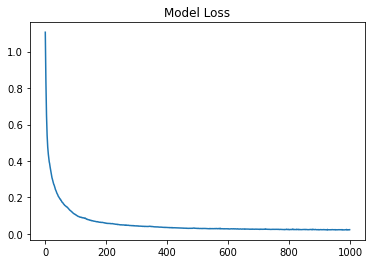

In [177]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.show()

In [186]:

encoder_model = Model(encoder_inputs,encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h,decoder_state_input_c]
decoder_outputs,state_h,state_c = decoder_lstm(
        decoder_inputs,initial_state = decoder_states_inputs
)
decoder_states = [state_h,state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)
encoder_model.save('encoder.h5')
decoder_model.save('decoder.h5')

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_dec_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, char2int['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = int2char[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_dec_len):
            stop_condition = True
            
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_dec_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

for seq_index in range(20):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Wrong sentence:', input_texts[seq_index])
    print('Corrected sentence:', decoded_sentence)
    print('Ground Truth:',target_texts[seq_index])

-
Wrong sentence: نتنزحر
Corrected sentence: نتناحر

Ground Truth: 	نتناحر

-
Wrong sentence: وقتلوه
Corrected sentence: وقتلوه

Ground Truth: 	وقتلوه

-
Wrong sentence: سجنوه
Corrected sentence: سجنوه

Ground Truth: 	سجنوه

-
Wrong sentence: أر؟لته
Corrected sentence: أرسلته

Ground Truth: 	أرسلته

-
Wrong sentence: بتوسلات
Corrected sentence: بتوسلات

Ground Truth: 	بتوسلات

-
Wrong sentence: يصون8وا
Corrected sentence: يصونوا

Ground Truth: 	يصونوا

-
Wrong sentence: فرض
Corrected sentence: فرض

Ground Truth: 	فرض

-
Wrong sentence: الصهيونيون
Corrected sentence: الصهيونيون

Ground Truth: 	الصهيونيون

-
Wrong sentence: إنصاتهدم
Corrected sentence: إنصاتهم

Ground Truth: 	إنصاتهم

-
Wrong sentence: وتنظياته
Corrected sentence: وتنظيماته

Ground Truth: 	وتنظيماته

-
Wrong sentence: يقوى
Corrected sentence: يقوى

Ground Truth: 	يقوى

-
Wrong sentence: يجرحون
Corrected sentence: يجرحون

Ground Truth: 	يجرحون

-
Wrong sentence: التفاخر
Corrected sentence: التفاخر

Ground Truth: 	التفاخر


In [185]:
encoder_input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.